<div class="alert alert-block alert-success"><h4>练习1</h4><p>
    利用Python中的sklearn，实现决策树
</p></div>

### 1. 决策树实现分类任务

#### 数据处理和训练

In [24]:
from sklearn import tree, model_selection
from sklearn import datasets
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import graphviz

In [2]:
# 数据生成和处理
# 设置分类数据为：200样本，8个指标，4个有效指标，三分类任务
X,y = datasets.make_classification(n_samples=200, n_features=8, n_informative=4, random_state=42, n_classes=3)

In [50]:
# 决策树训练
def tree_train(X,y,depth=2):
    
    # 随机划分样本，80%训练，20%测试
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)
    
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(train_X,train_y)

    predict_train_y = clf.predict(train_X)
    predict_test_y = clf.predict(test_X)
    
    train_accuracy = sum(predict_train_y == train_y)/train_y.shape[0]
    test_accuracy = sum(predict_test_y == test_y)/test_y.shape[0]
    
    return [clf,train_accuracy,test_accuracy]

#### 最大深度为2时的决策树

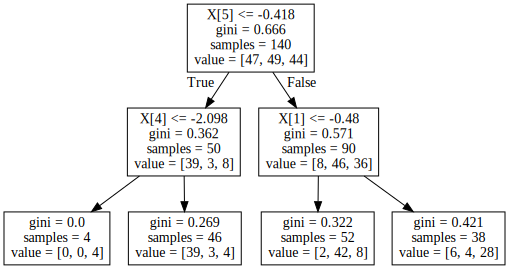

In [51]:
myclf,_,_ = tree_train(X,y)
dot_data = tree.export_graphviz(myclf)  
graph = graphviz.Source(dot_data)  
graph

#### 最大深度的选取

In [46]:
import matplotlib.pyplot as plt

In [59]:
result = np.array([tree_train(X,y,j)[1:3] for j in range(1,10)])
train_accuracy = result[:,0]
test_accuracy = result[:,1]

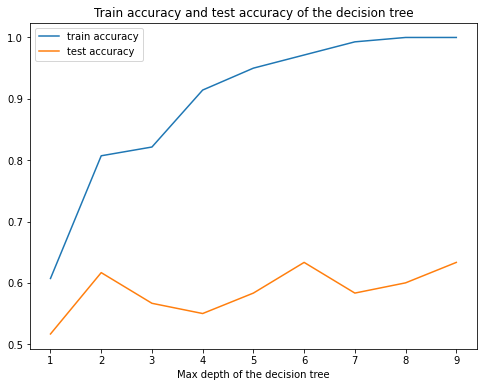

In [71]:
plt.figure(figsize=(8,6))
plt.plot(range(1,10), train_accuracy, label='train accuracy')
plt.plot(range(1,10), test_accuracy, label='test accuracy')
plt.xlabel("Max depth of the decision tree")
plt.title("Train accuracy and test accuracy of the decision tree")
plt.legend()
plt.show()

In [79]:
print("训练集正确率为：%.2f%%" % (tree_train(X,y,2)[1]*100))
print("测试集正确率为：%.2f%%" % (tree_train(X,y,2)[2]*100))

训练集正确率为：80.71%
测试集正确率为：61.67%


综合图形来看，决策树深度为2可能是一个最好的选择，过深的决策树产生了更大的过拟合现象。

### 2. 决策树实现回归任务

In [81]:
# 设置回归数据为：200样本，8个指标，5个有效指标
X,y = datasets.make_regression(n_samples=200, n_features=8, n_informative=5, random_state=0)

In [82]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
clf = tree.DecisionTreeRegressor(max_depth=4)
clf = clf.fit(train_X,train_y)

In [84]:
predict_train_y = clf.predict(train_X)
predict_test_y = clf.predict(test_X)

In [88]:
print("训练集上的均方误差为%.2f" % (mse(predict_train_y, train_y)))
print("测试集上的均方误差为%.2f" % (mse(predict_test_y, test_y)))

训练集上的均方误差为1436.47
测试集上的均方误差为4694.86


因此可见，虽然决策树可以用于回归，但其并不是一个好的选择。